In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the csv-files into a pandas dataframe
df0 = pd.read_csv('data/scenario0.csv')
df1 = pd.read_csv('data/scenario1.csv')
df2 = pd.read_csv('data/scenario2.csv')
df3 = pd.read_csv('data/scenario3.csv')
df4 = pd.read_csv('data/scenario4.csv')
df5 = pd.read_csv('data/scenario5.csv')
df6 = pd.read_csv('data/scenario6.csv')
df7 = pd.read_csv('data/scenario7.csv')
df8 = pd.read_csv('data/scenario8.csv')
# Creating a list of the dataframes
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8]

In [3]:
def adding_scenario_column(df, s):
    # Add a column with the number of the scenario
    df['scenario'] = s
    return df

In [4]:
def create_subset(df):
    # Filter on the rows with only the last time-step, as that is the step we are interested in
    df = df[df['Step']==7200]
    # Create a subset of the dataframe with the desired columns
    df_subset = df[['scenario', 'iteration', 'avg_delay', 'avg_driving_time']]
    return df_subset

In [5]:
def concat_dfs(dfs):
    # Create an empty list to store the cleaned dataframes in
    df_list = []
    # Loop over the dataframes
    for s, df in enumerate(dfs):
        # Add a column with the scenario number
        df = adding_scenario_column(df, s)
        # Create a subset of the dataframe
        df_subset = create_subset(df)
        # Append the cleaned dataframe to the list
        df_list.append(df_subset)
    # Concat the dataframes in the list
    full_df = pd.concat(df_list, ignore_index=True)
    return full_df

In [6]:
# Call the concat_function and assign the dataframe to full_df
full_df = concat_dfs(dfs)

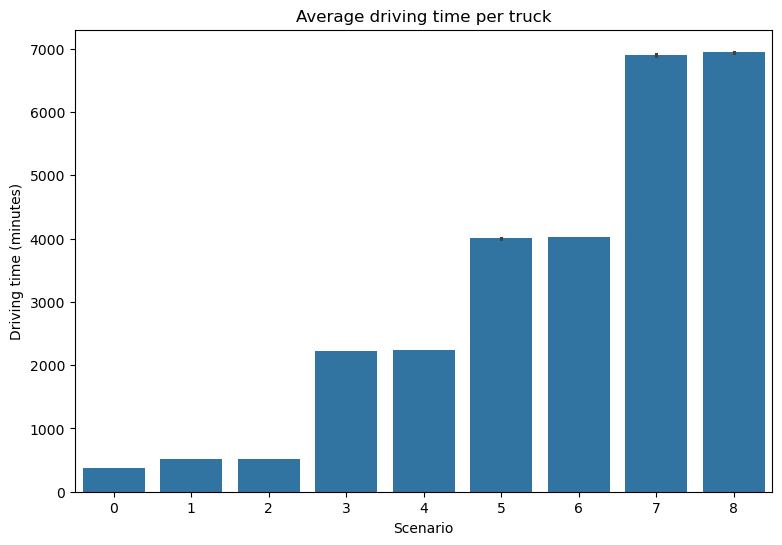

In [7]:
# Create a barplot of the average driving time
plt.figure(figsize=(9, 6))
sns.barplot(x=full_df['scenario'], y=full_df['avg_driving_time'])
plt.title('Average driving time per truck')
plt.xlabel('Scenario')
plt.ylabel('Driving time (minutes)')
plt.savefig('img/barplot_avg_driving_time.png')
plt.show()

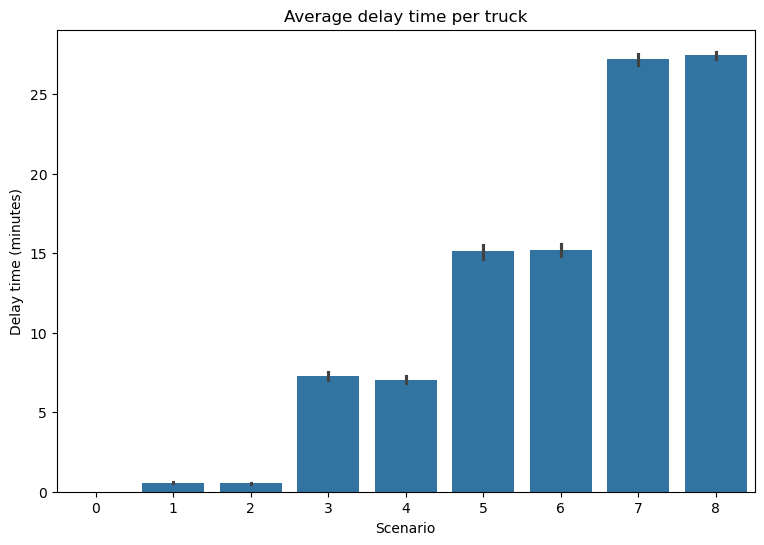

In [8]:
# Create a barplot of the average delay time
plt.figure(figsize=(9, 6))
sns.barplot(x=full_df['scenario'], y=full_df['avg_delay'])
plt.title('Average delay time per truck')
plt.xlabel('Scenario')
plt.ylabel('Delay time (minutes)')
plt.savefig('img/barplot_avg_delay_time.png')
plt.show()